In this project, we are trying to solve the sentiment classifier problem. Unlike other problems, we need to covert data into word embedings because, computer can only understand numbers and we need to convert words to numbers and categorize the text into one of the 12 categories provided.

In [4]:
import pandas as pd
df = pd.read_csv('https://github.com/msaricaumbc/DS_data/blob/master/ds602/dataset_newsletter.csv?raw=true')

In [5]:
df.drop(columns='Unnamed: 0', inplace = True)

In [6]:
df.head()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [7]:
df.dtypes

title             object
body              object
signature         object
submissiontime    object
category          object
dtype: object

In [8]:
df.describe()

,title,body,signature,submissiontime,category
count,19597,19604,19207,19607,19607
unique,12358,16358,2844,17778,12
top,2nd Grade News,.,Angie O'Brien,1/28/22 10:58 AM,ANNOUNCEMENTS
freq,147,130,777,7,10240


In [9]:
#since Category has no null values, grouping the dataframe with Category
df.groupby('category').count()

,title,body,signature,submissiontime
category,,,,
ACHIEVEMENTS,25,25,25,25
ANNOUNCEMENTS,10236,10238,10081,10240
ATHLETICS,170,170,170,170
BREAKING NEWS,3644,3648,3585,3649
CLUBS,363,363,363,363
DONATIONS NEEDED,63,63,63,63
FIELD TRIPS,53,53,53,53
IMPORTANT NEWS,452,452,451,452
PTO,1506,1507,1427,1507


In [10]:
title_null_counts = df.groupby('category')['title'].apply(lambda x: x.isnull().sum())
print(title_null_counts)

category
ACHIEVEMENTS         0
ANNOUNCEMENTS        4
ATHLETICS            0
BREAKING NEWS        5
CLUBS                0
DONATIONS NEEDED     0
FIELD TRIPS          0
IMPORTANT NEWS       0
PTO                  1
STUDENT THOUGHTS     0
UPCOMING EVENTS      0
VOLUNTEERS NEEDED    0
Name: title, dtype: int64


In [11]:
body_null_counts = df.groupby('category')['body'].apply(lambda x: x.isnull().sum())
print(body_null_counts)

category
ACHIEVEMENTS         0
ANNOUNCEMENTS        2
ATHLETICS            0
BREAKING NEWS        1
CLUBS                0
DONATIONS NEEDED     0
FIELD TRIPS          0
IMPORTANT NEWS       0
PTO                  0
STUDENT THOUGHTS     0
UPCOMING EVENTS      0
VOLUNTEERS NEEDED    0
Name: body, dtype: int64


In [12]:
signature_null_counts = df.groupby('category')['signature'].apply(lambda x: x.isnull().sum())
print(signature_null_counts)

category
ACHIEVEMENTS           0
ANNOUNCEMENTS        159
ATHLETICS              0
BREAKING NEWS         64
CLUBS                  0
DONATIONS NEEDED       0
FIELD TRIPS            0
IMPORTANT NEWS         1
PTO                   80
STUDENT THOUGHTS       0
UPCOMING EVENTS       93
VOLUNTEERS NEEDED      3
Name: signature, dtype: int64


In [13]:
# since the amount of null values in the data is negligible, we are dropping the rows with atleast one null values. 
#To cite another reason, based on the domain, 'body' can have a more impact compared to signature or title and the null contents in the body is less 
temp_df = df.dropna()

In [14]:
temp_df.isna().sum()

title             0
body              0
signature         0
submissiontime    0
category          0
dtype: int64

In [15]:
temp_df.describe()

,title,body,signature,submissiontime,category
count,19197,19197,19197,19197,19197
unique,12162,16032,2843,17425,12
top,2nd Grade News,.,Angie O'Brien,1/28/22 10:58 AM,ANNOUNCEMENTS
freq,147,129,777,7,10077


In [16]:
# single dot appears for 129 times in 'body' column and does not contibute much to the model. Dropping the rows which has '.'
value_to_remove = '.'
mask = temp_df['body'] != value_to_remove
filtered_df = temp_df[mask]
filtered_df

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


In [17]:
filtered_df.describe()

,title,body,signature,submissiontime,category
count,19068,19068,19068,19068,19068
unique,12073,16031,2842,17307,12
top,2nd Grade News,Get connected! Follow CMIT North Elementary on...,Angie O'Brien,1/28/22 10:58 AM,ANNOUNCEMENTS
freq,147,35,777,7,10052


In [18]:
filtered_df.category.value_counts()

ANNOUNCEMENTS        10052
BREAKING NEWS         3547
UPCOMING EVENTS       2952
PTO                   1400
IMPORTANT NEWS         421
CLUBS                  363
ATHLETICS              170
DONATIONS NEEDED        63
FIELD TRIPS             53
VOLUNTEERS NEEDED       24
ACHIEVEMENTS            20
STUDENT THOUGHTS         3
Name: category, dtype: int64

In [30]:
temp_df = pd.concat([filtered_df,week_processed], axis = 1)
temp_df.columns= [*filtered_df.columns,'isweekend']
temp_df.dropna().groupby('category')['isweekend'].value_counts()

category           isweekend
ACHIEVEMENTS       1              17
                   0               3
ANNOUNCEMENTS      1            9116
                   0             936
ATHLETICS          1             153
                   0              17
BREAKING NEWS      1            2750
                   0             797
CLUBS              0             216
                   1             147
DONATIONS NEEDED   1              62
                   0               1
FIELD TRIPS        1              50
                   0               3
IMPORTANT NEWS     1             379
                   0              42
PTO                1            1092
                   0             308
STUDENT THOUGHTS   0               2
                   1               1
UPCOMING EVENTS    1            2495
                   0             457
VOLUNTEERS NEEDED  1              23
                   0               1
Name: isweekend, dtype: int64

In [31]:
#we have the filtered data. Since 3 out of 4 coumns are text data, we have to convert the text data into word embeddings.
#converting to word embeeddings
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#using a model from hugging face library
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [33]:
filtered_df = filtered_df.reset_index()

In [34]:
#Since bert model does all the preprocessing in backend, we do not want to preprocess the sentence like remove stop words, converting to lowercase, removing puntuations etc.
body_embeddings = model.encode(filtered_df.body.astype(str))

In [35]:
body_embeddings.shape

(19068, 384)

In [36]:
title_embeddings = model.encode(filtered_df.title)

In [37]:
title_embeddings.shape

(19068, 384)

In [38]:
signature_embeddings = model.encode(filtered_df.signature)

In [39]:
signature_embeddings.shape

(19068, 384)

In [40]:
week_unprocessed = pd.to_datetime(filtered_df.submissiontime)

In [41]:
week_unprocessed

0       2015-11-18 09:26:00
1       2015-12-16 21:26:00
2       2015-11-18 15:30:00
3       2015-11-15 16:49:00
4       2015-11-16 05:21:00
                ...        
19063   2023-01-11 10:28:00
19064   2023-01-13 09:43:00
19065   2023-01-13 09:49:00
19066   2023-01-15 20:29:00
19067   2023-02-06 12:54:00
Name: submissiontime, Length: 19068, dtype: datetime64[ns]

In [42]:
week_processed = week_unprocessed.dt.weekday.map(lambda x: 0 if x >= 5 else 1)

In [43]:
week_processed

0        1
1        1
2        1
3        0
4        1
        ..
19063    1
19064    1
19065    1
19066    0
19067    1
Name: submissiontime, Length: 19068, dtype: int64

**written analysis of cleaned data for characteristics**
- We have cleaned the data by removing null values and by removing the unnecessary values in the columns.
- We have converted the Submission time column to differentiate between weekend or weekday to reduce computational overheads.
- We have used BERT to convert words to word embeddings as it is an attention based model, and can give better results compared to TF-IDF or Count Vectorizer.

**Note**
Since BERT can handle all text related pre-processing work, we will not be performing any of the pre-processing steps explicitly

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
title_transformed = pca.fit_transform(title_embeddings)
print(title_transformed.shape)
body_transformed = pca.fit_transform(body_embeddings)
print(body_transformed.shape)
signature_transformed = pca.fit_transform(signature_embeddings)
print(signature_transformed.shape)


(19068, 20)
(19068, 20)
(19068, 20)


In [46]:
title_df = pd.DataFrame(title_transformed)#, columns=['Title_Column_1', 'Title_Column_2'])

In [47]:
body_df = pd.DataFrame(body_transformed)#, columns=['Body_Column_1', 'Body_Column_2'])

In [48]:
signature_df = pd.DataFrame(signature_transformed)#, columns=['Sign_Column_1', 'Sign_Column_2'])

In [49]:
X = pd.concat([title_df, body_df,signature_df, week_processed], axis=1)#, keys=[title_df, body_df,signature_df])
X.columns=X.columns.astype(str) 

In [50]:
y = filtered_df.category

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [53]:
#X.columns = [x for x in range(0,16)]
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('pcs', PCA()),
    ('clf', LogisticRegression())
])

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pcs__n_components' :[ 5,15,None],
    'clf__penalty' : [None,'elasticnet']

}

In [55]:
grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv=5)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pcs', PCA()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__penalty': [None, 'elasticnet'],
                         'pcs__n_components': [5, 15, None]})

In [56]:
grid_search.best_score_

0.6299334698110266

In [57]:
#X.columns = [x for x in range(0,16)]
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('pcs', PCA()),
    ('clf', RandomForestClassifier())
])

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pcs__n_components' :[5,15,None],
    'clf__n_estimators' : [25,100,None],
    'clf__max_depth' : [5,10,None],
}

In [59]:
grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv=5)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pcs', PCA()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__max_depth': [5, 10, None],
                         'clf__n_estimators': [25, 100, None],
                         'pcs__n_components': [5, 15, None]})

In [60]:
grid_search.best_score_

0.7224336659305468

In [61]:
grid_search.best_params_

{'clf__max_depth': None, 'clf__n_estimators': 100, 'pcs__n_components': 15}

In [77]:
#X.columns = [x for x in range(0,16)]
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline([
    ('pcs', PCA()),
    ('clf', SVC())
])

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pcs__n_components' :[10, 20,None],
    'clf__gamma' : [5,10,'scale'],
}

In [79]:
grid_search = GridSearchCV(pipeline, param_grid = param_grid, cv=3)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=Pipeline(steps=[('pcs', PCA()), ('clf', SVC())]),
             param_grid={'clf__gamma': [5, 10, 'scale'],
                         'pcs__n_components': [10, 20, None]})

In [80]:
grid_search.best_score_

0.739347393806986

In [83]:
grid_search.best_params_

{'clf__gamma': 'scale', 'pcs__n_components': None}

so far Support Vector Classifier is the good model according to the score. But also considering Random FOrest for F1 score as the accuracy is almost same

In [91]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
clf = SVC(gamma='scale') 
clf.fit(X_train, y_train)

SVC()

In [94]:
y_pred_clf = clf.predict(X_test)
y_pred_forest = forest.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
cm_clf = confusion_matrix(y_test,y_pred_clf)
cm_forest = confusion_matrix(y_test,y_pred_forest)

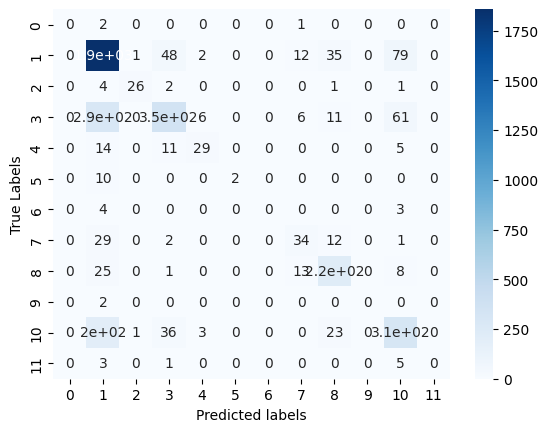

In [97]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm_clf,annot=True,cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.show()

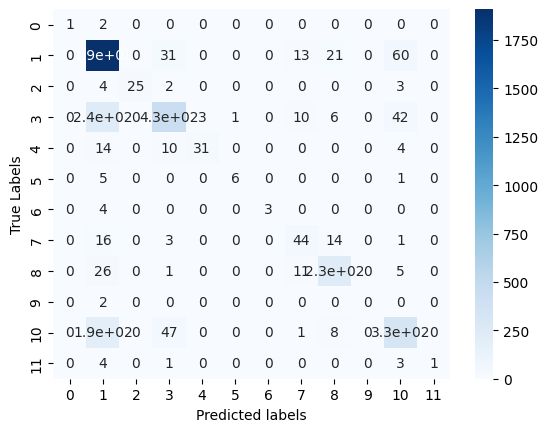

In [98]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm_forest,annot=True,cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.show()

It is evident that there are good amount of misclassifications between labels 1,10 and 3. Model is not able to better distinguish between 

In [99]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred_clf,average='weighted')
print('F1 Score : ', f1*100)

F1 Score :  72.74836070669778


In [100]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred_forest,average='weighted')
print('F1 Score : ', f1*100)

F1 Score :  77.80074365406315


We are choosing F1 Score here as our metrics because, we cannot take accuracy into account as the classes are highly imbalabced and it is not clear that we need to reduce true positives or flase potsitives. So we are choosing the harmonic mean of precision and recall i.e, F1 Score. So far with 77.8 F1 score, random forest is the best model